#Setup & Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [2]:

#Mount folder to save and retrieve outputs
drive.mount('/content/Drive3',force_remount=True)
%cd "/content/Drive3/My Drive/ML/StockModels/"

Mounted at /content/Drive3
/content/Drive3/My Drive/ML/StockModels


#Import Data and Discovery

In [3]:

df_full = pdr.get_data_yahoo("AAPL", start="2018-01-01").reset_index()

df_full.to_csv('output/AAPL.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded


In [4]:
df_full.shape

(428, 7)

In [5]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [6]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,189.269603,191.171963,187.492664,189.349767,186.869200,3.192506e+07
std,19.699378,19.786240,19.615980,19.701987,19.931548,1.362092e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.087502,175.149994,172.712498,174.240005,171.164211,2.239458e+07
50%,188.365005,189.769997,186.779999,188.525002,185.567421,2.844490e+07
75%,204.292495,206.432495,202.992496,204.507500,203.391636,3.787712e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


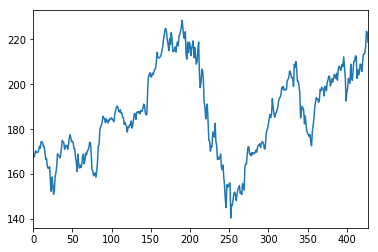

In [7]:

df_full["Adj Close"].plot()

# Data Preproccessing


In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [12]:
y_test.shape

(80,)

#Modeling and Adding perfomance check for all Models

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

## Baseline

In [0]:
y_pred_lag=np.roll(y_test,1)

In [19]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.9604
Mean Squared Error: 27.7842
Root Mean Squared Error: 5.2711


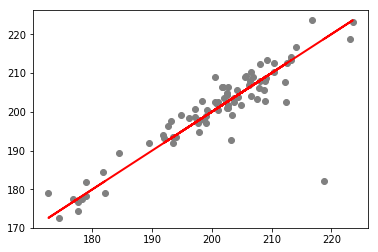

In [17]:
get_plot(y_pred_lag)

## Linear Regression

In [20]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [22]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9299
Mean Squared Error: 13.7611
Root Mean Squared Error: 3.7096


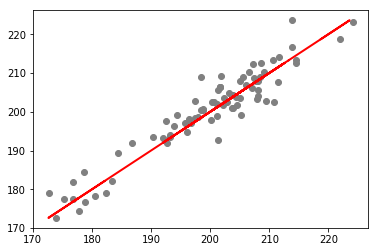

In [23]:
get_plot(y_pred_lr)

In [24]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9299
Mean Squared Error: 13.7611
Root Mean Squared Error: 3.7096


## Method #1- Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [26]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.9297
Mean Squared Error: 13.7587
Root Mean Squared Error: 3.7093


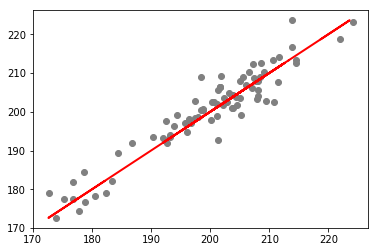

In [27]:
get_plot(y_pred_ridge)

## Gradient Boosting Trees

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [29]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.5132
Mean Squared Error: 17.8919
Root Mean Squared Error: 4.2299


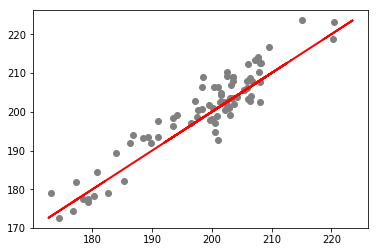

In [30]:
get_plot(y_pred_gb)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

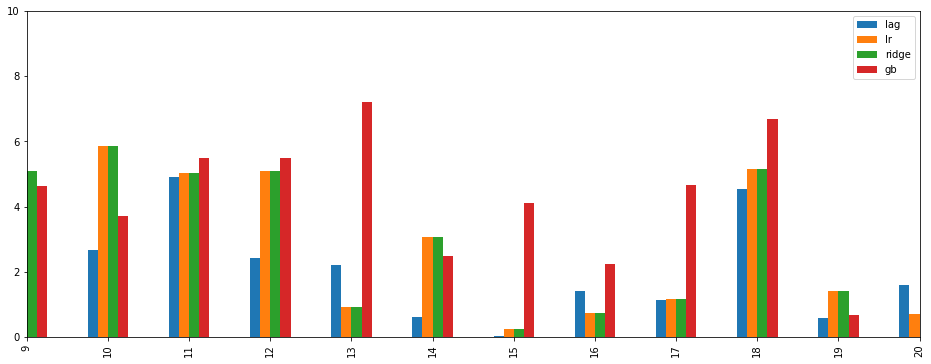

In [32]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

# Conclusion and Next Steps

We cycled through 4 different algorithms, ranging from simple to complex:

*   lag (previous day's price)
*   linear regression
*   ridge regresssion
*   gradient boosting trees

We concluded that linear regression give us the best performance with the least complexity.

Next steps might include adding additional features such as trend and recent volatility.



# Resources



*   [An Introduction to Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370)
*   [Colab: Agent Trading](https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW#scrollTo=Lo2Pg-dcY5_U)
*   [In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)
*   [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)






